In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d

In [40]:
file = 'output_data.csv'
df = pd.read_csv(file)
scale = 1 # scale factor for the voronoi diagram

In [41]:
df['Zcos(RA)'], df['Zsin(RA)'] = df['Zcos(RA)']*scale, df['Zsin(RA)']*scale
df['Zcos(Dec)'], df['Zsin(Dec)'] = df['Zcos(DEC)']*scale, df['Zsin(DEC)']*scale

In [38]:
filtered_df = df[df['DEC'] > 0.0]
lims = (-1.2,1.104)
# Filter the DataFrame based on the 'DEC' column
filtered_df = df[(df['DEC'] >= lims[0]) & (df['DEC'] <= lims[1])]
ZRA = np.column_stack((filtered_df['Zcos(RA)'], filtered_df['Zsin(RA)']))
ZDEC = np.column_stack((filtered_df['Zcos(DEC)'], filtered_df['Zsin(DEC)']))

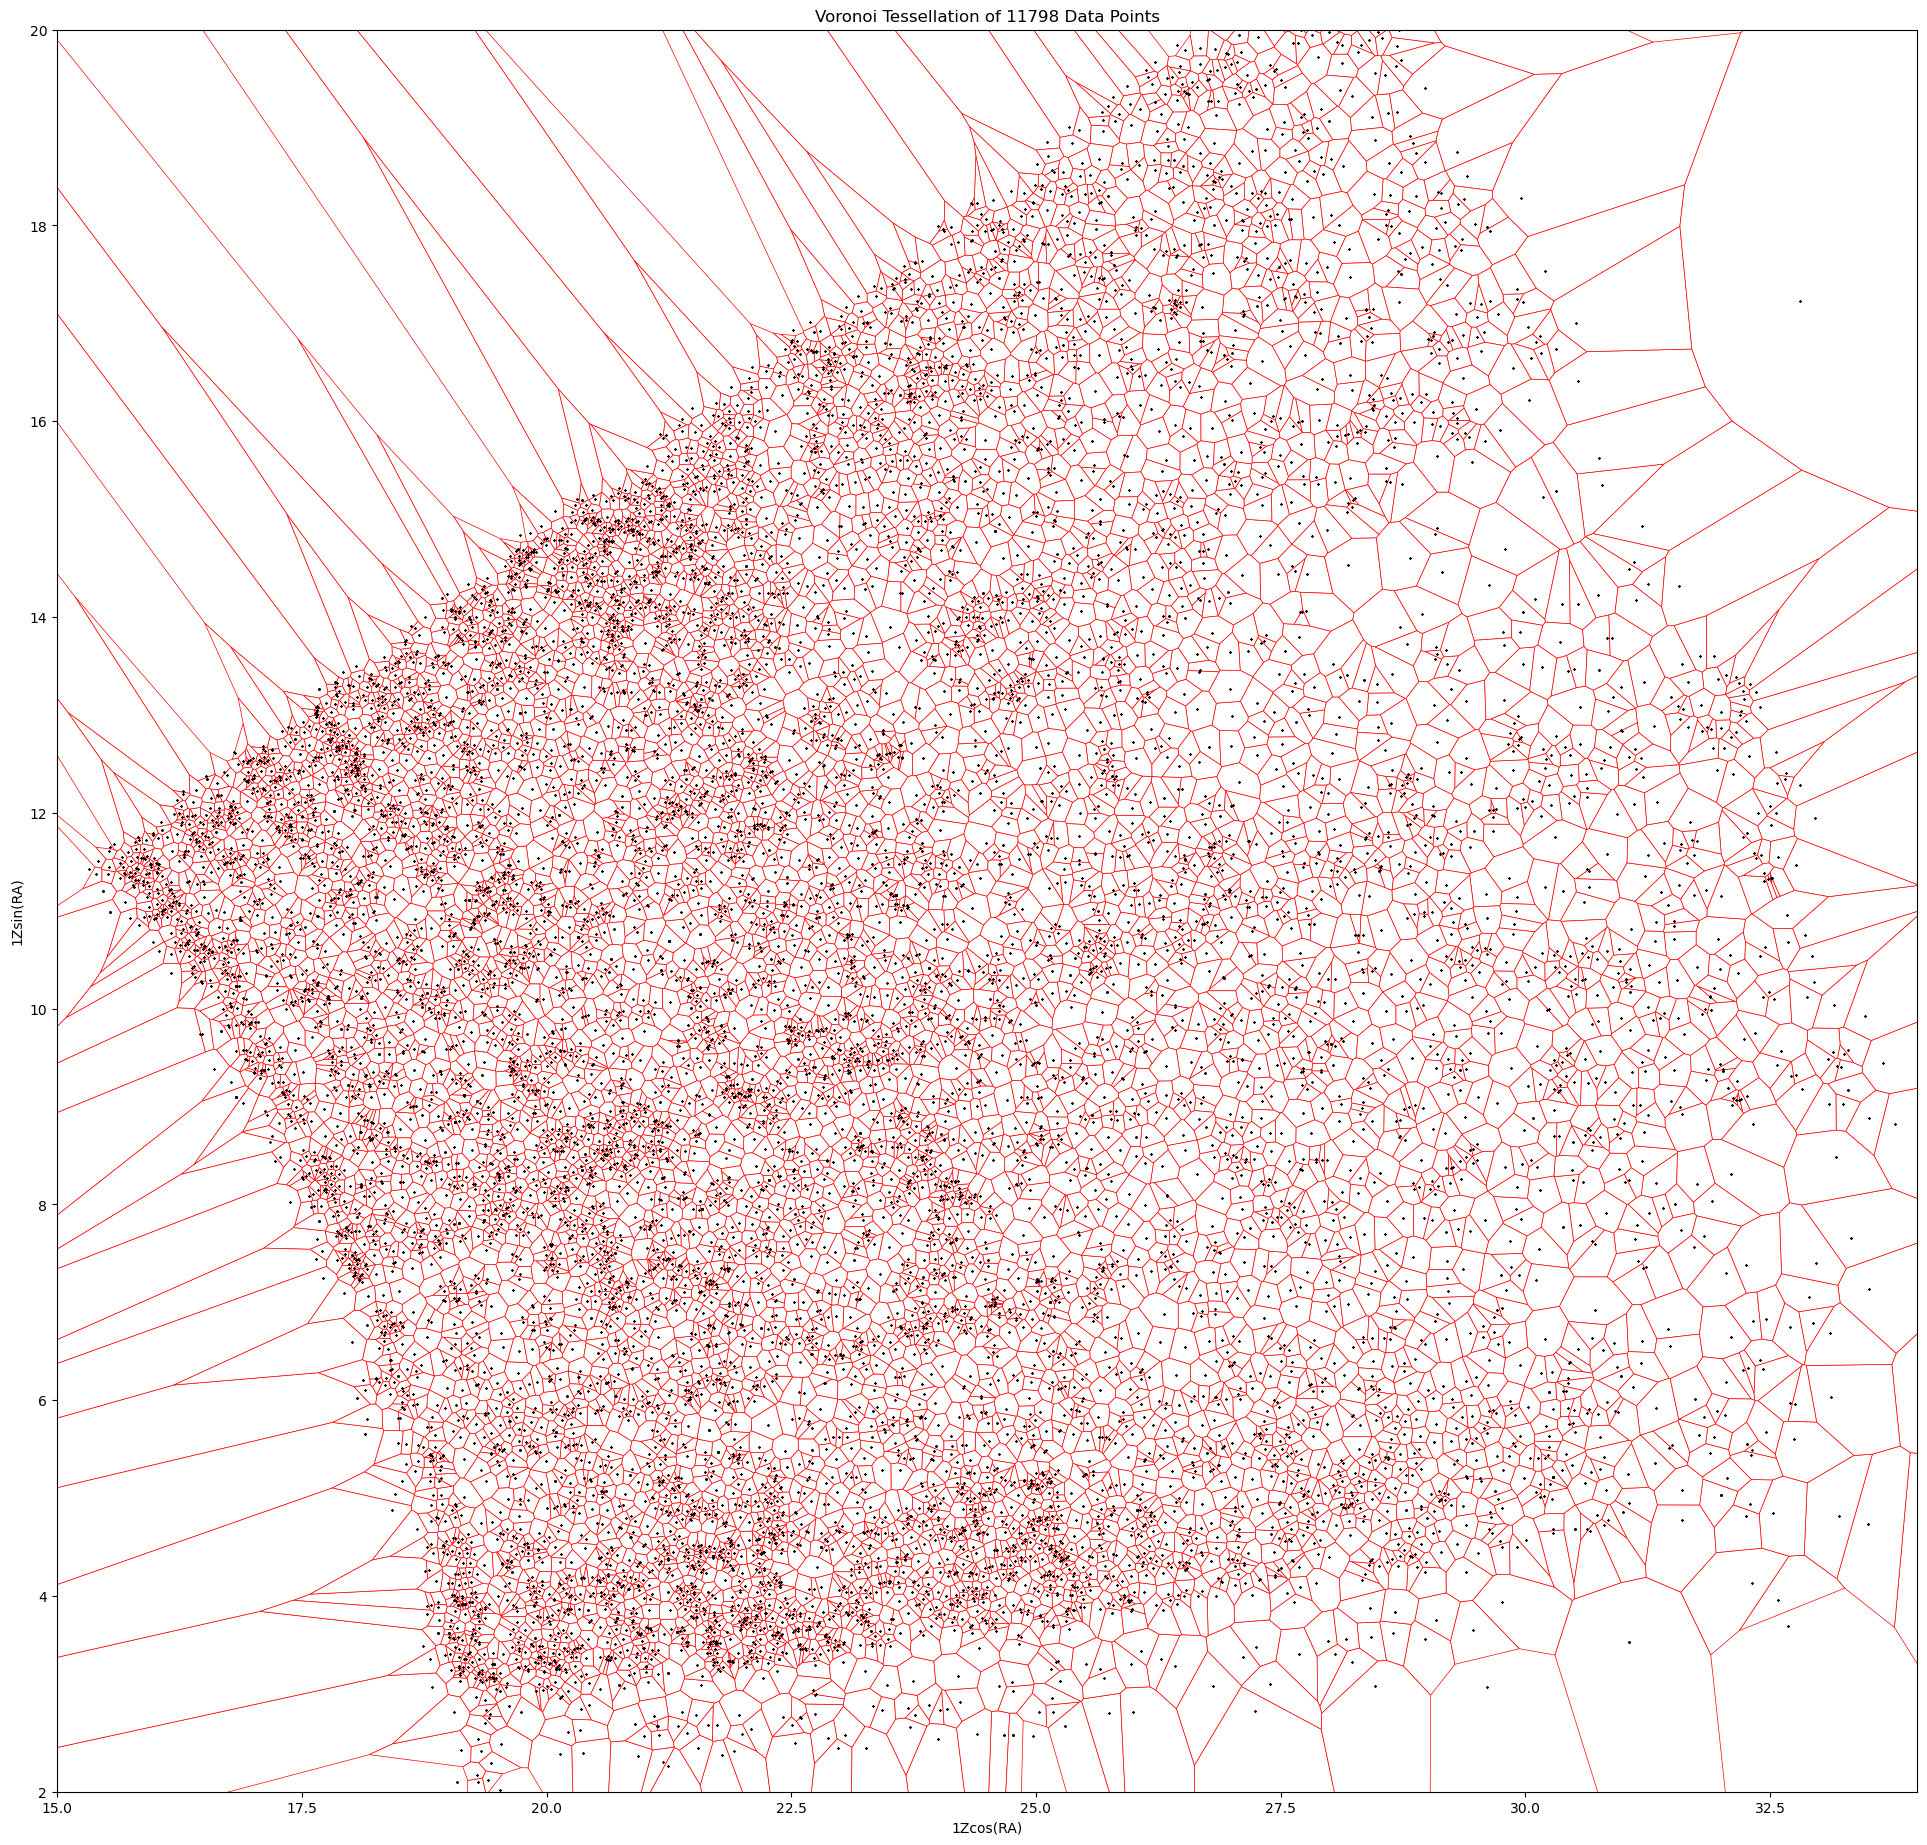

In [42]:
vorRA = Voronoi(ZRA)
x, y = ZRA[:,0], ZRA[:,1]
xmin, xmax = 15, 34
ymin, ymax = 2,20

plt.figure(figsize=(24,24))

for region in vorRA.regions:
    if not -1 in region:
        polygon = [vorRA.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color='white', edgecolor='red', lw=0.5)

plt.scatter(x, y, color='black', marker='x', label='Data Points', s=1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.title(f'Voronoi Tessellation of {len(ZRA)} Data Points')
plt.xlabel(f'{scale}Zcos(RA)')
plt.ylabel(f'{scale}Zsin(RA)')

plt.gca().set_aspect('equal')

plt.savefig('./plots/voronoi_tessellation_range1_RA.pdf', format='pdf', bbox_inches='tight')


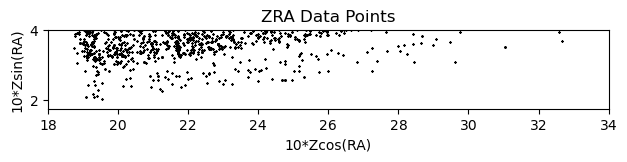

In [13]:
plt.scatter(df['Zcos(RA)'], df['Zsin(RA)'] , color='black', marker='x', label='Data Points', s=1)
plt.xlim(18,34)
plt.ylim(1.75,4)
plt.tight_layout()
plt.gca().set_aspect('equal')
plt.savefig('C:/Users/mmann/Downloads/ZRA_data_zoomed.pdf', format='pdf', bbox_inches='tight')
plt.xlabel(f'{scale}*Zcos(RA)')
plt.ylabel(f'{scale}*Zsin(RA)')
plt.title(f'ZRA Data Points')
plt.show()